# Project: Investigate a Dataset (TMDb movie data)



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The TMDb movie dataset contains information about 10,000 movies collected from The Movie Database (TMDb)
> in this analysis I am going to answer these questions:
> * Which genres are most popular from year to year?
> * What kinds of properties are associated with movies that have high revenues?
> * is there a relation between months and revenue?
> * dose budget plays a role in revenue of a movie?
> * what characteristics make the movie successful?

<a id='wrangling'></a>
## Assessing data 
* There are nan values in several columns
* Genre column is untidy
* There are unnecessary columns for analysis
* Release_date column is integer
* Data needs more specific columns


### General Properties

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning 

#### Steps of cleaning the data
* replace nan values in genres with unknown
* replace 0 and nan values in budget_adj and revenue_adj with median value
* replace nan values in cast with unknown
* replace nan values in director with unknown
* replace nan values in production_companies with unknown
* drop homepage, tagline, overview, other columns that will not be used in the analysis
* convert date to DateTime
* Create a column for months
* create a column for profit margin
* fixing untidiness by separating genre column into more specific columns

In [6]:
# change to datetime
df.release_date = pd.to_datetime(df.release_date)

###### function that replaces 0 with Nan and returns a list of values

In [7]:
# function that replaces 0 with Nan and returns a list of values
def turn_into_nan(column_name):
    list_of_values = []
    for value in column_name:
        if value == 0.0:
            list_of_values.append(np.nan)
        else:
            list_of_values.append(value)
    return list_of_values

In [8]:
df['budget_adj'] = turn_into_nan(df['budget_adj'])

In [9]:
df['revenue_adj'] = turn_into_nan(df['revenue_adj'])

In [10]:
# replace nan values with median inbudget_adj and revenue_adj columns
df.budget_adj = df.budget_adj.replace(np.nan, df.budget_adj.median())
df.revenue_adj = df.revenue_adj.replace(np.nan, df.revenue_adj.median())

In [11]:
# replace nan vlaues with unknown 
df.genres = df.genres.replace(np.nan, 'unknown')
df.imdb_id = df.imdb_id.replace(np.nan, 'unknown')
df.cast = df.cast.replace(np.nan, 'unknown')
df.director = df.director.replace(np.nan, 'unknown')
df.production_companies = df.production_companies.replace(np.nan, 'unknown')

In [12]:
# creating profit magrin column
df['margin'] = df.revenue_adj - df.budget_adj
# convert type to string
df['genres'] = df['genres'].astype(str)

In [13]:
# replace | with - in genres column
df.genres.replace('|','-',inplace=True)
for i in df.genres:
    i = i.replace('|','-')  

In [14]:
# drop columns 
df.drop(['overview','tagline','homepage','keywords'],axis = 1,inplace= True)

In [15]:
#convert type to integer
df['budget_adj'] = df['budget_adj'].astype('int64')
df['revenue_adj'] = df['revenue_adj'].astype('int64')

In [16]:
# creat month column 
list = df.release_date.values
list = list.astype('str')
for i in range(len(list)):
    list[i] = list[i][5:7]

In [17]:
for i in range(len(list)):
    if list[i] == '01':
        list[i] = 'Jan'
    elif list[i] == '02':
        list[i] = 'Feb'
    elif list[i] == '03':
        list[i] = 'Mar'
    elif list[i] == '04':
        list[i] = 'Apr'
    elif list[i] == '05':
        list[i] = 'May'
    elif list[i] == '06':
        list[i] = 'Jun'
    elif list[i] == '07':
        list[i] = 'Jul'
    elif list[i] == '08':
        list[i] = 'Aug'
    elif list[i] == '09':
        list[i] = 'Sep'
    elif list[i] == '10':
        list[i] = 'Oct'
    elif list[i] == '11':
        list[i] = 'Nov'
    elif list[i] == '12':
        list[i] = 'Dec'

In [18]:
df['month'] = list

In [19]:
# separate genre column into several columns
df["genre1"]= df["genres"].str.split("|")

In [20]:
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,margin,month,genre1
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892,1.254446e+09,Jun,"[Action, Adventure, Science Fiction, Thriller]"
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939,348161292,2.101614e+08,May,"[Action, Adventure, Science Fiction, Thriller]"
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955,271619025,1.704191e+08,Mar,"[Adventure, Science Fiction, Thriller]"
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919,1902723129,1.718723e+09,Dec,"[Action, Adventure, Science Fiction, Fantasy]"
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923,1385748801,1.210949e+09,Apr,"[Action, Crime, Thriller]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,2066-06-15,11,7.4,1966,22722708,43927485,2.120478e+07,Jun,[Documentary]
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,20,5.7,1966,22722708,43927485,2.120478e+07,Dec,"[Action, Adventure, Drama]"
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,2066-01-01,11,6.5,1966,22722708,43927485,2.120478e+07,Jan,"[Mystery, Comedy]"
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,2066-11-02,22,5.4,1966,22722708,43927485,2.120478e+07,Nov,"[Action, Comedy]"


In [21]:
# separate every value in the list to specific column
df['genre 1'] = df['genre1'].str[0:1]
df['genre 2'] = df['genre1'].str[1:2]
df['genre 3'] = df['genre1'].str[2:3]
df['genre 4'] = df['genre1'].str[3:4]
df['genre 5'] = df['genre1'].str[4:5]
df['genre 6'] = df['genre1'].str[5:6]
df['genre 7'] = df['genre1'].str[6:7]
df['genre 1'] = df['genre 1'].astype(str)
df['genre 2'] = df['genre 2'].astype(str)
df['genre 3'] = df['genre 3'].astype(str)
df['genre 4'] = df['genre 4'].astype(str)
df['genre 5'] = df['genre 5'].astype(str)
df['genre 6'] = df['genre 6'].astype(str)
df['genre 7'] = df['genre 7'].astype(str)
df['genre 1'] = df['genre 1'].str[1:]
df['genre 1'] = df['genre 1'].str[1:]
df['genre 2'] = df['genre 2'].str[:-2]
df['genre 3'] = df['genre 3'].str[:-2]
df['genre 4'] = df['genre 4'].str[:-2]
df['genre 5'] = df['genre 5'].str[:-2]
df['genre 6'] = df['genre 6'].str[:-2]
df['genre 7'] = df['genre 7'].str[:-2]

In [22]:
df['genre 1'] = df['genre 1'].str[:-2]

In [23]:
df.drop(['genre 6','genre 7','genre1'],axis = 1,inplace = True)

In [24]:
df['genre 2'] = df['genre 2'].str[1:]
df['genre 3'] = df['genre 3'].str[1:]
df['genre 4'] = df['genre 4'].str[1:]
df['genre 5'] = df['genre 5'].str[1:]

In [25]:
df['genre 2'] = df['genre 2'].str[1:]
df['genre 3'] = df['genre 3'].str[1:]
df['genre 4'] = df['genre 4'].str[1:]
df['genre 5'] = df['genre 5'].str[1:]

In [26]:
# Creat column for every genre and place 1 if True and 0 if False
df['Action']=0
df['Adventure']=0
df['Western']=0
df['Science Fiction']=0
df['Drama']=0
df['Family']=0
df['Comedy']=0
df['Crime']=0
df['Romance']=0
df['War']=0
df['Mystery']=0
df['Fantasy']=0
df['Thriller']=0
df['History']=0
df['Horror']=0
df['Music']=0
df['Documentary']=0
df['TV Movie']=0
df['Animation']=0

df

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,...,War,Mystery,Fantasy,Thriller,History,Horror,Music,Documentary,TV Movie,Animation
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,...,0,0,0,0,0,0,0,0,0,0
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,...,0,0,0,0,0,0,0,0,0,0
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,...,0,0,0,0,0,0,0,0,0,0
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,...,0,0,0,0,0,0,0,0,0,0
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,...,0,0,0,0,0,0,0,0,0,0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,...,0,0,0,0,0,0,0,0,0,0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,...,0,0,0,0,0,0,0,0,0,0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,...,0,0,0,0,0,0,0,0,0,0


In [27]:
n = 0
for i in df['genre 1']:
    if i == 'Action':
        df['Action'].iloc[n]= 1
    elif i == 'Adventure':
        df['Adventure'].iloc[n]= 1
    elif i == 'Western':
        df['Western'].iloc[n]= 1
    elif i == 'Science Fiction':
        df['Science Fiction'].iloc[n]= 1
    elif i == 'Drama':
        df['Drama'].iloc[n]= 1
    elif i == 'Family':
        df['Family'].iloc[n]= 1
    elif i == 'Comedy':
        df['Comedy'].iloc[n]= 1
    elif i == 'Crime':
        df['Crime'].iloc[n]= 1
    elif i == 'Romance':
        df['Romance'].iloc[n]= 1
    elif i == 'War':
        df['War'].iloc[n]= 1
    elif i == 'Mystery':
        df['Mystery'].iloc[n]= 1
    elif i == 'Thriller':
        df['Thriller'].iloc[n]= 1
    elif i == 'Fantasy':
        df['Fantasy'].iloc[n]= 1
    elif i == 'History':
        df['History'].iloc[n]= 1
    elif i == 'Animation':
        df['Animation'].iloc[n]= 1
    elif i == 'Horror':
        df['Horror'].iloc[n]= 1
    elif i == 'Music':
        df['Music'].iloc[n]= 1
    elif i == 'TV Movie':
        df['TV Movie'].iloc[n]= 1
    elif i == 'Documentary':
        df['Documentary'].iloc[n]= 1

    n+=1
    
        

C:\Users\Monged\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [28]:
n = 0
for i in df['genre 2']:
    if i == 'Action':
        df['Action'].iloc[n]= 1
    elif i == 'Adventure':
        df['Adventure'].iloc[n]= 1
    elif i == 'Western':
        df['Western'].iloc[n]= 1
    elif i == 'Science Fiction':
        df['Science Fiction'].iloc[n]= 1
    elif i == 'Drama':
        df['Drama'].iloc[n]= 1
    elif i == 'Family':
        df['Family'].iloc[n]= 1
    elif i == 'Comedy':
        df['Comedy'].iloc[n]= 1
    elif i == 'Crime':
        df['Crime'].iloc[n]= 1
    elif i == 'Romance':
        df['Romance'].iloc[n]= 1
    elif i == 'War':
        df['War'].iloc[n]= 1
    elif i == 'Mystery':
        df['Mystery'].iloc[n]= 1
    elif i == 'Thriller':
        df['Thriller'].iloc[n]= 1
    elif i == 'Fantasy':
        df['Fantasy'].iloc[n]= 1
    elif i == 'History':
        df['History'].iloc[n]= 1
    elif i == 'Animation':
        df['Animation'].iloc[n]= 1
    elif i == 'Horror':
        df['Horror'].iloc[n]= 1
    elif i == 'Music':
        df['Music'].iloc[n]= 1
    elif i == 'TV Movie':
        df['TV Movie'].iloc[n]= 1
    elif i == 'Documentary':
        df['Documentary'].iloc[n]= 1
    n+=1
    

In [29]:
n = 0
for i in df['genre 3']:
    if i == 'Action':
        df['Action'].iloc[n]= 1
    elif i == 'Adventure':
        df['Adventure'].iloc[n]= 1
    elif i == 'Western':
        df['Western'].iloc[n]= 1
    elif i == 'Science Fiction':
        df['Science Fiction'].iloc[n]= 1
    elif i == 'Drama':
        df['Drama'].iloc[n]= 1
    elif i == 'Family':
        df['Family'].iloc[n]= 1
    elif i == 'Comedy':
        df['Comedy'].iloc[n]= 1
    elif i == 'Crime':
        df['Crime'].iloc[n]= 1
    elif i == 'Romance':
        df['Romance'].iloc[n]= 1
    elif i == 'War':
        df['War'].iloc[n]= 1
    elif i == 'Mystery':
        df['Mystery'].iloc[n]= 1
    elif i == 'Thriller':
        df['Thriller'].iloc[n]= 1
    elif i == 'Fantasy':
        df['Fantasy'].iloc[n]= 1
    elif i == 'History':
        df['History'].iloc[n]= 1
    elif i == 'Animation':
        df['Animation'].iloc[n]= 1
    elif i == 'Horror':
        df['Horror'].iloc[n]= 1
    elif i == 'Music':
        df['Music'].iloc[n]= 1
    elif i == 'TV Movie':
        df['TV Movie'].iloc[n]= 1
    elif i == 'Documentary':
        df['Documentary'].iloc[n]= 1
    n+=1
    

In [30]:
n = 0
for i in df['genre 4']:
    if i == 'Action':
        df['Action'].iloc[n]= 1
    elif i == 'Adventure':
        df['Adventure'].iloc[n]= 1
    elif i == 'Western':
        df['Western'].iloc[n]= 1
    elif i == 'Science Fiction':
        df['Science Fiction'].iloc[n]= 1
    elif i == 'Drama':
        df['Drama'].iloc[n]= 1
    elif i == 'Family':
        df['Family'].iloc[n]= 1
    elif i == 'Comedy':
        df['Comedy'].iloc[n]= 1
    elif i == 'Crime':
        df['Crime'].iloc[n]= 1
    elif i == 'Romance':
        df['Romance'].iloc[n]= 1
    elif i == 'War':
        df['War'].iloc[n]= 1
    elif i == 'Mystery':
        df['Mystery'].iloc[n]= 1
    elif i == 'Thriller':
        df['Thriller'].iloc[n]= 1
    elif i == 'Fantasy':
        df['Fantasy'].iloc[n]= 1
    elif i == 'History':
        df['History'].iloc[n]= 1
    elif i == 'Animation':
        df['Animation'].iloc[n]= 1
    elif i == 'Horror':
        df['Horror'].iloc[n]= 1
    elif i == 'Music':
        df['Music'].iloc[n]= 1
    elif i == 'TV Movie':
        df['TV Movie'].iloc[n]= 1
    elif i == 'Documentary':
        df['Documentary'].iloc[n]= 1
    n+=1
    

In [31]:
n = 0
for i in df['genre 5']:
    if i == 'Action':
        df['Action'].iloc[n]= 1
    elif i == 'Adventure':
        df['Adventure'].iloc[n]= 1
    elif i == 'Western':
        df['Western'].iloc[n]= 1
    elif i == 'Science Fiction':
        df['Science Fiction'].iloc[n]= 1
    elif i == 'Drama':
        df['Drama'].iloc[n]= 1
    elif i == 'Family':
        df['Family'].iloc[n]= 1
    elif i == 'Comedy':
        df['Comedy'].iloc[n]= 1
    elif i == 'Crime':
        df['Crime'].iloc[n]= 1
    elif i == 'Romance':
        df['Romance'].iloc[n]= 1
    elif i == 'War':
        df['War'].iloc[n]= 1
    elif i == 'Mystery':
        df['Mystery'].iloc[n]= 1
    elif i == 'Thriller':
        df['Thriller'].iloc[n]= 1
    elif i == 'Fantasy':
        df['Fantasy'].iloc[n]= 1
    elif i == 'History':
        df['History'].iloc[n]= 1
    elif i == 'Animation':
        df['Animation'].iloc[n]= 1
    elif i == 'Horror':
        df['Horror'].iloc[n]= 1
    elif i == 'Music':
        df['Music'].iloc[n]= 1
    elif i == 'TV Movie':
        df['TV Movie'].iloc[n]= 1
    elif i == 'Documentary':
        df['Documentary'].iloc[n]= 1   
    n+=1
    

In [32]:
# no need for these column after creating the genre columns
df.drop(['genre 2','genre 3','genre 4'],axis = 1,inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which genres are most popular from year to year?)

In [33]:
df.groupby(['release_year']).sum()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj,margin,...,War,Mystery,Fantasy,Thriller,History,Horror,Music,Documentary,TV Movie,Animation
release_year,,,,,,,,,,,,,,,,,,,,,
1960,502889,14.685834,22056948,145005000,3541,2481,202.4,685247440,2167304267,1.482057e+09,...,2,0,2,6,5,7,1,0,0,0
1961,578367,13.107641,46137000,337720188,3702,2405,197.6,745571749,3386099079,2.640527e+09,...,2,1,2,0,3,3,2,0,0,1
1962,544034,14.553069,54722126,215579846,3979,2392,203.0,803470384,2564328451,1.760858e+09,...,3,4,1,7,4,5,1,0,0,0
1963,562904,17.092019,73331500,187404989,3785,2816,215.2,1044755713,2520399227,1.475644e+09,...,1,6,2,10,4,9,0,0,0,1
1964,729942,17.321989,39483161,340981782,4587,3137,260.9,981981121,3890727595,2.908746e+09,...,3,4,4,9,3,6,5,0,0,2
1965,614765,11.990529,70205115,458081854,4136,1820,216.8,1031203956,4488009195,3.456805e+09,...,8,3,0,11,4,5,2,0,1,1
1966,759644,13.989152,57554800,84736689,4917,1460,281.9,1159226060,2370289204,1.211063e+09,...,4,6,2,8,2,3,0,1,0,3
1967,697188,18.846147,100652200,737834637,4198,3102,249.7,1157839218,5965165303,4.807326e+09,...,1,3,3,5,0,4,5,1,0,2
1968,726515,18.883866,71939000,264732980,4184,4217,248.8,996327957,2845643507,1.849316e+09,...,4,4,5,5,3,4,3,0,0,3


In [34]:
group = df.groupby(['release_year']).sum()[['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama' ,'Family','Comedy' ,'Crime', 'Romance', 'War', 'Mystery', 'Fantasy', 'Thriller', 'History', 'Horror','Music', 'Documentary', 'TV Movie', 'Animation']]

In [35]:
# A grouped dataframe by years shows the number of each movie genre each year
group

,Action,Adventure,Western,Science Fiction,Drama,Family,Comedy,Crime,Romance,War,Mystery,Fantasy,Thriller,History,Horror,Music,Documentary,TV Movie,Animation
release_year,,,,,,,,,,,,,,,,,,,
1960,8,5,6,3,13,3,8,2,6,2,0,2,6,5,7,1,0,0,0
1961,7,6,3,4,16,5,10,2,7,2,1,2,0,3,3,2,0,0,1
1962,8,7,3,2,21,2,5,3,5,3,4,1,7,4,5,1,0,0,0
1963,4,7,2,2,13,3,13,4,8,1,6,2,10,4,9,0,0,0,1
1964,5,5,1,4,20,4,16,10,9,3,4,4,9,3,6,5,0,0,2
1965,9,6,4,2,20,3,7,2,5,8,3,0,11,4,5,2,0,1,1
1966,14,11,7,6,16,7,16,5,6,4,6,2,8,2,3,0,1,0,3
1967,7,7,2,4,16,3,17,7,11,1,3,3,5,0,4,5,1,0,2
1968,6,5,1,4,20,5,9,5,6,4,4,5,5,3,4,3,0,0,3


In [36]:
plt.rcParams['figure.figsize'] = (18,6)

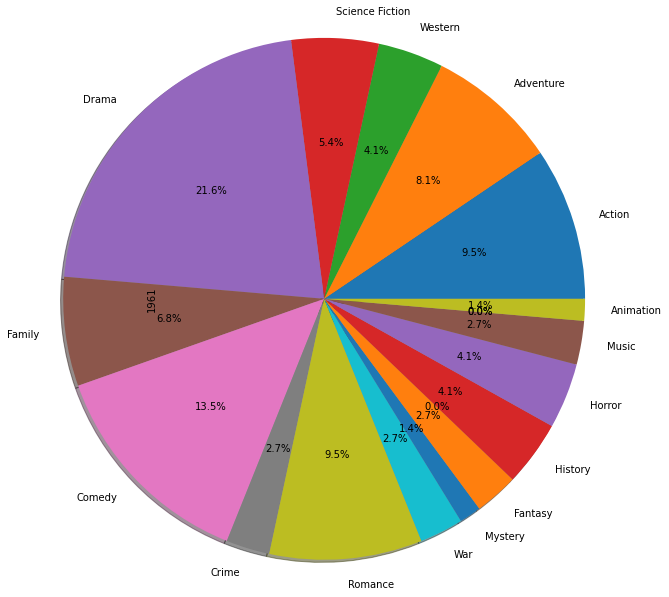

In [50]:
# there are 54 more pie charts could be placed
group.iloc[1].plot(kind='pie',radius=2, autopct='%1.1f%%', shadow=True);

### Research Question 2  (Relation between month and revenue!)

In [38]:
df.groupby(['month']).mean().index.values

array(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Sep'], dtype=object)

In [39]:
df.groupby(['month']).mean()['revenue_adj']

month
Apr    6.462871e+07
Aug    5.877187e+07
Dec    1.070181e+08
Feb    5.733379e+07
Jan    4.844212e+07
Jul    9.610798e+07
Jun    1.197473e+08
Mar    7.351663e+07
May    1.000835e+08
Nov    9.625713e+07
Oct    5.989822e+07
Sep    4.708753e+07
Name: revenue_adj, dtype: float64

In [40]:
mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
rev_values = [4.84421230e+07,5.73337941e+07,7.351663e+07,6.462871e+07,1.000835e+08,1.197473e+08,9.610798e+07,5.877187e+07,4.708753e+07,5.989822e+07,9.625713e+07,1.070181e+08]

## Relation between month and revenue
#### we found that releasing movie during mid-year or end-year leads to a higher revenue

Text(0, 0.5, 'income')

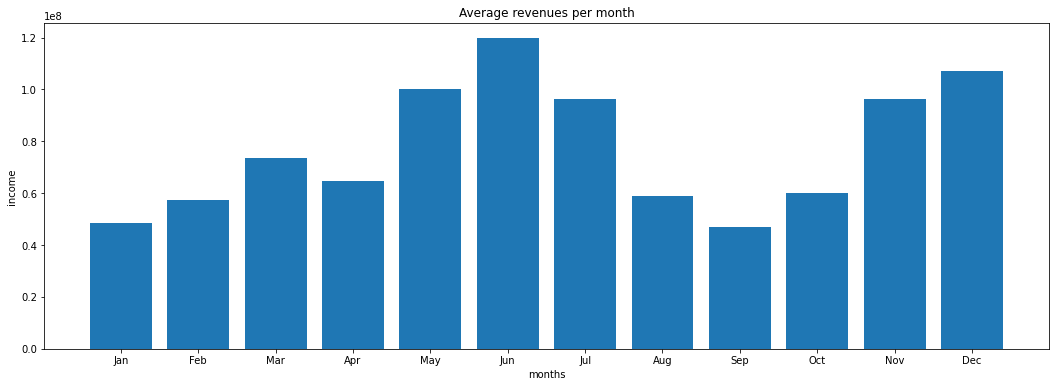

In [41]:
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12],rev_values,tick_label =mon)
plt.title('Average revenues per month')
plt.xlabel('months')
plt.ylabel('income')

#### In this bar chart we can see that releasing movie during mid-year or end-year has the highest revenue

### Research Question 3  (Is there relation between genre and revenue?)

In [42]:
genre_revenue = [112422297.32201257,160428769.9503739,72723982.4121212,109872207.90325204,63345992.792270534,113358102.54346061,71314184.05035593,75430652.92398524,69625133.32943925,91624466.02962963,72581880.94814815,133054026.12772925,77684333.7665062,71753597.96407185,52956243.653023824,70557639.4485294,37569150.26153846,44014081.51497006,114289743.43633762]
genre_names = ['Action','Adventure','Western','Science Fiction','Drama','Family','Comedy','Crime','Romance','War','Mystery','Fantasy','Thriller','History','Horror','Music','Documentary','TV Movie','Animation']

## relation between genre and revenue
#### By looking at this graph we see that the most popular movies do not get the highest average revenue unlike other less popular genres

Text(0, 0.5, 'income')

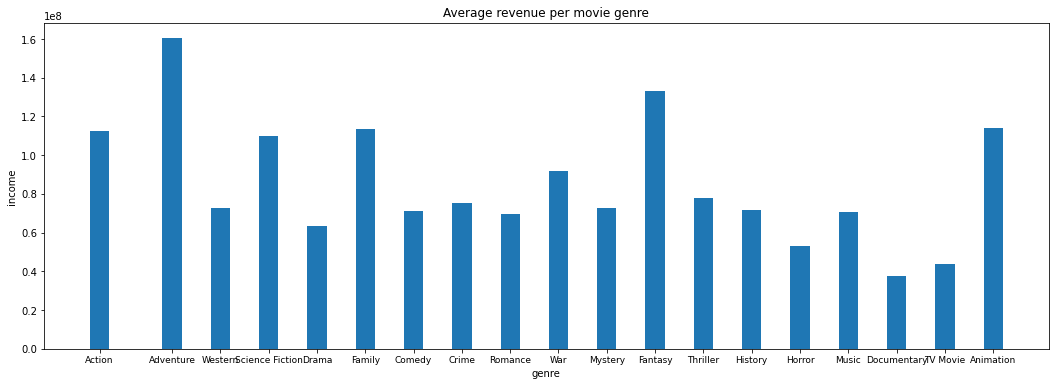

In [43]:
plt.bar([1,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38],genre_revenue,tick_label =genre_names);
plt.xticks(fontsize=9);
plt.title('Average revenue per movie genre')
plt.xlabel('genre')
plt.ylabel('income')

#### By looking at this graph we see that the most popular movies do not get the highest average revenue unlike other less popular genres

### Research Question 4  (is there a relation between genre and profit margin?)

## relation between genre and profit margin
####  less popular genres get more profit margin than the most common ones

Text(0, 0.5, 'margin income')

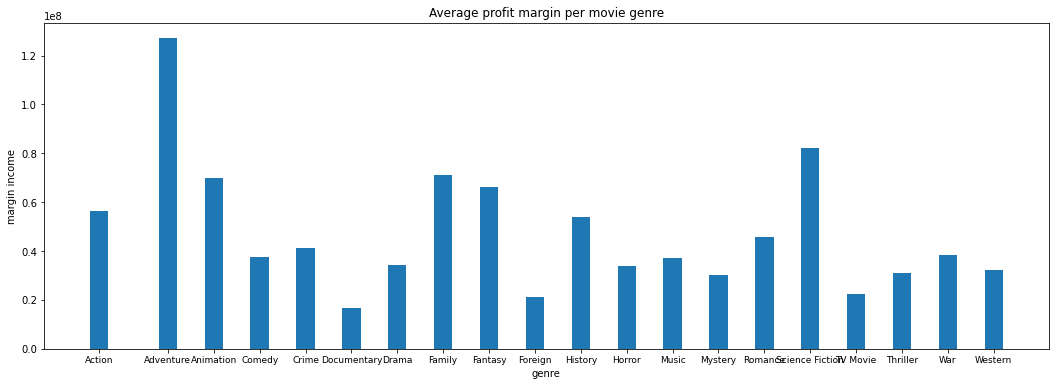

In [44]:
plt.bar([1,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40],df.groupby(['genre 1']).mean().margin.values[:-1],tick_label =df.groupby(['genre 1']).mean().index[:-1]);
plt.xticks(fontsize=9);
plt.title('Average profit margin per movie genre')
plt.xlabel('genre')
plt.ylabel('margin income')

####  less popular genres get more profit margin than the most common ones

In [45]:
df.groupby(['vote_average']).mean()

,id,popularity,budget,revenue,runtime,vote_count,release_year,budget_adj,revenue_adj,margin,...,War,Mystery,Fantasy,Thriller,History,Horror,Music,Documentary,TV Movie,Animation
vote_average,,,,,,,,,,,,,,,,,,,,,
1.5,23674.000000,0.078520,9.500000e+03,0.000000e+00,80.000000,12.500000,1986.500000,1.142518e+07,4.392748e+07,3.250231e+07,...,0.0,0.0,0.0,0.000000,0.0,0.500000,0.0,0.0,0.0,0.000000
2.0,120846.000000,0.079281,0.000000e+00,0.000000e+00,75.000000,13.000000,2012.000000,2.272271e+07,4.392748e+07,2.120478e+07,...,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.000000
2.1,51676.333333,0.155900,0.000000e+00,3.036441e+06,90.000000,19.333333,2008.333333,2.272271e+07,3.279039e+07,1.006769e+07,...,0.0,0.0,0.0,0.000000,0.0,0.666667,0.0,0.0,0.0,0.000000
2.2,135476.333333,0.051765,2.166667e+07,2.456867e+04,87.333333,14.333333,2012.333333,3.572626e+07,2.930832e+07,-6.417941e+06,...,0.0,0.0,0.0,0.333333,0.0,0.333333,0.0,0.0,0.0,0.333333
2.3,14997.500000,0.181587,0.000000e+00,0.000000e+00,92.500000,15.000000,1996.500000,2.272271e+07,4.392748e+07,2.120478e+07,...,0.0,0.0,0.0,0.000000,0.0,0.500000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8.6,45644.000000,0.067753,0.000000e+00,0.000000e+00,163.000000,10.000000,2010.000000,2.272271e+07,4.392748e+07,2.120478e+07,...,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0,0.0,0.0,0.000000
8.7,24970.000000,0.212010,0.000000e+00,0.000000e+00,145.000000,23.000000,2006.000000,2.272271e+07,4.392748e+07,2.120478e+07,...,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0,0.0,0.0,0.000000
8.8,212864.500000,0.175912,0.000000e+00,0.000000e+00,60.500000,34.000000,2012.000000,2.272271e+07,4.392748e+07,2.120478e+07,...,0.0,0.5,0.0,0.500000,0.0,0.500000,0.0,0.5,0.0,0.000000


<AxesSubplot:xlabel='[budget_adj]', ylabel='[vote_average]'>

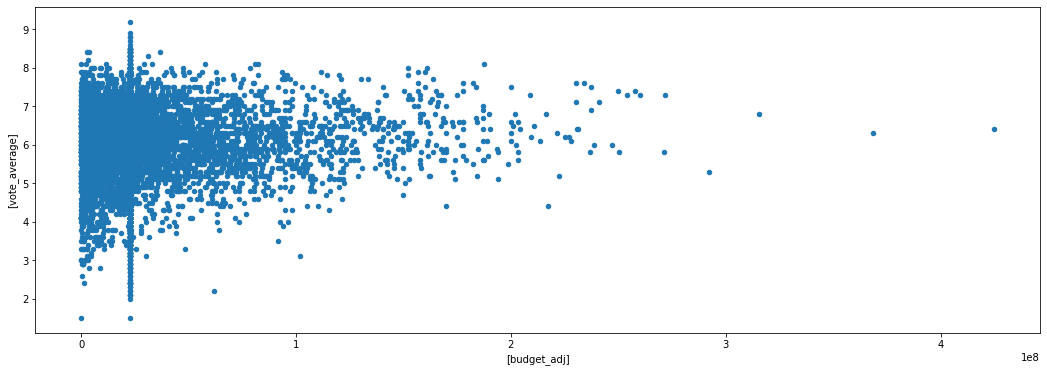

In [46]:
df.plot(x = ['budget_adj'], y = ['vote_average'], kind = 'scatter')

#### There is no relation between vote average and budget

<AxesSubplot:xlabel='[runtime]', ylabel='[vote_average]'>

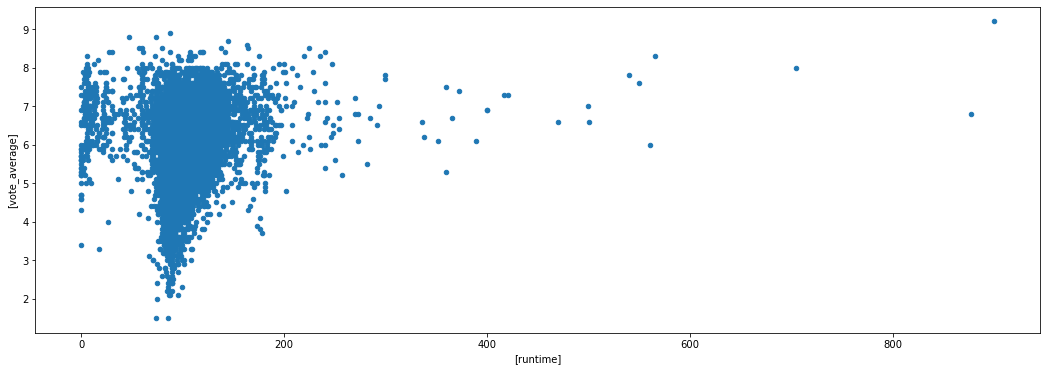

In [47]:
df.plot(x = ['runtime'], y = ['vote_average'], kind = 'scatter')

#### No relation between runtime and vote agerage

<AxesSubplot:xlabel='[runtime]', ylabel='[revenue_adj]'>

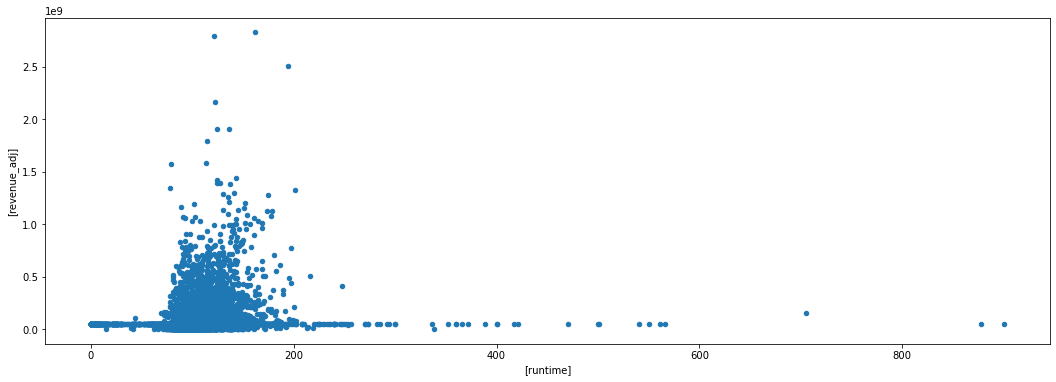

In [48]:
df.plot(x = ['runtime'], y = ['revenue_adj'], kind = 'scatter')

#### No relation between revenue and runtime

## Relation budget and revenue
#### there is a slightly correlation between budget and revenue(positive)

<AxesSubplot:xlabel='[budget_adj]', ylabel='[revenue_adj]'>

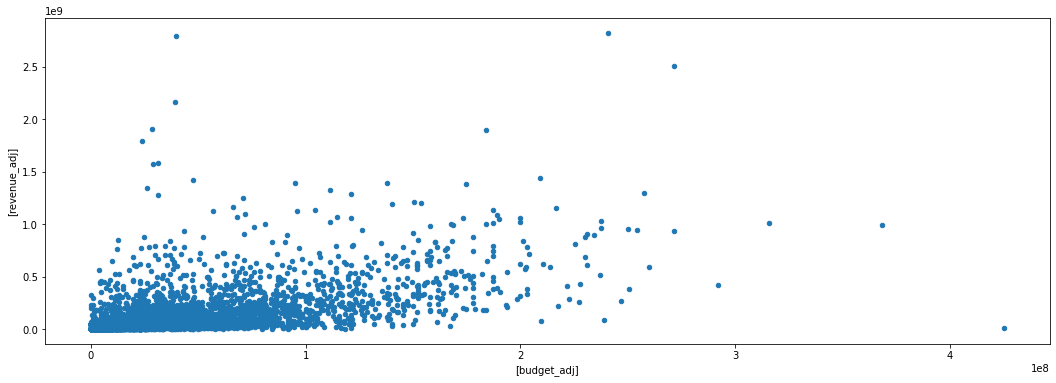

In [49]:
df.plot(x = ['budget_adj'], y = ['revenue_adj'], kind = 'scatter')

#### there is a slightly correlation between budget and revenue(positive)

<a id='conclusions'></a>
## Conclusions
###### Analysis has been done on this data set by completing the data wrangling process which I have done by importing the data file and after that, I have assessed the data looking for issues then I have cleaned the data by dealing with missing and untidy values also I have created column based on the data to help to complete the analysis and answer the questions 
##### The questions have been answered by using statistics and visualizations and I have reached the following results

* Drama, comedy, and thriller are the most popular genres from year to year
* There is a remarkable change in the financial returns of movies that shows in the middle and end of the year
* movies with a high budget receive high revenue
* non-popular movies get high revenue
* producing Adventure, fantasy, or animation movie genre in mid-year or end-of-year has the lowest potential of being a failure(high potential of success)


## Limitations
* missing values in object columns like director and production companies columns have been dealt with by replacing the missing values with 'unknown' which can lead to incomplete data but these missing values does not affect the previous analysis
* There were also missing or unavailable values for the revenue and budget column and these empty values were replaced by the median value to complete the analysis, based on this, this may affect the existing analytical results.
